In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### single

In [8]:
i = '10Hz'
MFfe, MFfi = np.load(f'data\\MF_out_{i}.npy')
MFcee, MFcii = np.load(f'data\\MF_out_cov_{i}.npy')
TNfe, TNfi = np.load(f'data\\TNetwork_out_{i}.npy')
MFtt = np.linspace(0,1, MFfe.size)
TNtt = np.linspace(0,1, TNfe.size)

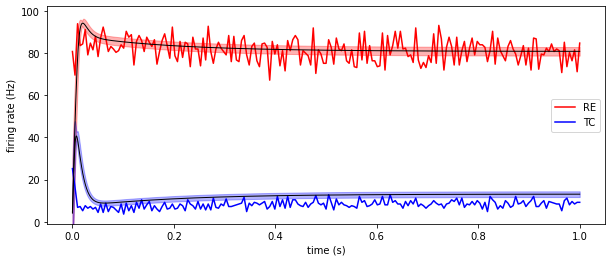

In [9]:
plt.figure(figsize=(10,4))
plt.plot(TNtt, TNfi, 'r', label='RE')
plt.plot(MFtt, MFfi, 'black', lw=1, alpha=1)
plt.fill_between(MFtt, MFfi-MFcii, MFfi+MFcii, color='r', alpha=0.3)
plt.plot(TNtt, TNfe, 'b', label='TC')
plt.plot(MFtt, MFfe, 'black', lw=1, alpha=1)
plt.fill_between(MFtt, MFfe-MFcee, MFfe+MFcee, color='b', alpha=0.3)

plt.ylim(-1)
plt.xlabel("time (s)")
plt.ylabel("firing rate (Hz)")
plt.legend()
plt.savefig(f"gfx\\comp_{i}.png", dpi=250)

#### MF TN scan

In [3]:
MFfe, MFfi = np.load("data\\MF_scan_freq.npy")
MFfe_T, MFfi_T = np.load("data\\MF_scan_freq_T.npy")
MFcee, MFcii = np.load("data\\MF_scan_cov.npy")
TNfe, TNfi = np.load("data\\TNetwork_scan.npy")
MFtt = np.linspace(0.01,30, MFfe.size)
TNtt = np.linspace(0.01,30, TNfe.size)

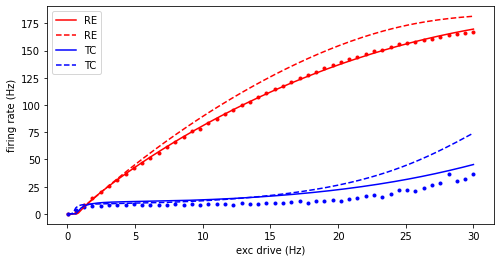

In [36]:
plt.figure(figsize=(8,4))
plt.plot(MFtt, MFfi, 'r', label='RE')
plt.plot(MFtt, MFfi_T, '--r', label='RE')
plt.plot(MFtt, MFfe, 'b', label='TC')
plt.plot(MFtt, MFfe_T, '--b', label='TC')
# plt.fill_between(MFtt, MFfi-MFcii*2, MFfi+MFcii*2, color='r', alpha=0.2)
# plt.fill_between(MFtt, MFfe-MFcee*2, MFfe+MFcee*2, color='b', alpha=0.2)
plt.plot(TNtt, TNfi, '.r', zorder=-1)
plt.plot(TNtt, TNfe, '.b', zorder=-1)

plt.xlabel("exc drive (Hz)")
plt.ylabel("firing rate (Hz)")
plt.legend()
# plt.savefig(f"gfx\\comp_scan30_new.png", dpi=250)

#### adaption comp

In [7]:
MFfe, MFfi = np.load("data\\MF_scan_freq_b.npy")
MFcee, MFcii = np.load("data\\MF_scan_cov_b.npy")
TNfe, TNfi = np.load("data\\TNetwork_scan_b.npy")
MFtt = np.linspace(0,200, MFfe.size)
TNtt = np.linspace(0,200, TNfe.size)

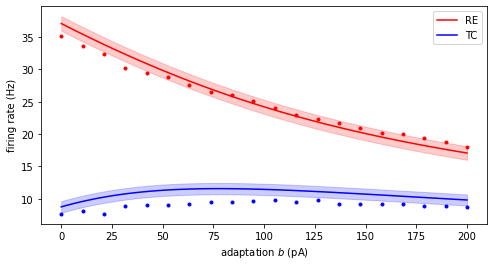

In [9]:
plt.figure(figsize=(8,4))
plt.plot(MFtt, MFfi, 'r', label='RE')
plt.plot(MFtt, MFfe, 'b', label='TC')
plt.fill_between(MFtt, MFfi-MFcii, MFfi+MFcii, color='r', alpha=0.2)
plt.fill_between(MFtt, MFfe-MFcee, MFfe+MFcee, color='b', alpha=0.2)
plt.plot(TNtt, TNfi, '.r', zorder=-1)
plt.plot(TNtt, TNfe, '.b', zorder=-1)

plt.xlabel("adaptation $b$ (pA)")
plt.ylabel("firing rate (Hz)")
plt.legend()
# plt.savefig(f"gfx\\comp_scan_b.png", dpi=250, bbox_inches='tight')

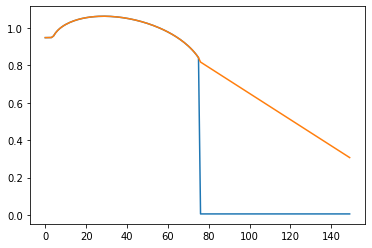

In [89]:
plt.plot(MFcii)
i=0
MFcii_copy = MFcii.copy()
for i in range(MFcii.size):
    if MFcii_copy[i]<0.1:
        MFcii_copy[i]=1.35-i*0.007
plt.plot(MFcii_copy)

### MF order 1&2 comp

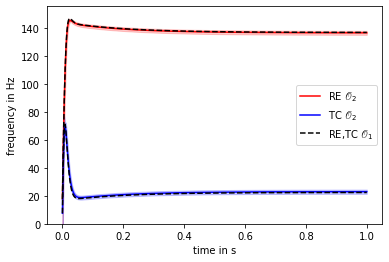

In [145]:
o1fe, o1fi = np.load('data\\MF_out_we_1order.npy')
o2fe, o2fi = np.load('data\\MF_out_we_2order.npy')
o2cee,o2cii=np.load('data\\MF_out_cov.npy')
plt.plot(MFtt,o2fi, 'r', label='RE $\mathscr{O}_2$')
plt.plot(MFtt,o2fe, 'b', label='TC $\mathscr{O}_2$')
plt.fill_between(MFtt,o2fi-o2cii, o2fi+o2cii, color='r', alpha=0.2)
plt.fill_between(MFtt,o2fe-o2cee, o2fe+o2cee, color='b', alpha=0.2)
plt.plot(MFtt,o1fe, c='black', ls='--', label='RE,TC $\mathscr{O}_1$')
plt.plot(MFtt,o1fi, c='black', ls='--')
plt.ylabel('frequency in Hz')
plt.xlabel('time in s')
plt.ylim(0)
plt.legend()
# plt.savefig('gfx\\order_comp.png', dpi=250)

___

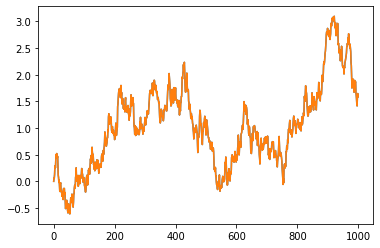

In [27]:
from mytools import ornstein_uhlenbeck
np.random.seed(42)
ou = ornstein_uhlenbeck(1000, 10, 1, 1, 1)
plt.plot(ou)
np.random.seed(42)
ou = ornstein_uhlenbeck(1000, 10, 1, 1, 1)
plt.plot(ou)